# Ana Foksiyon

In [3]:
# Kaynak: https://accelinstruments.com/Magnetic/Magnetic-field-calculator.html


import math
import matplotlib.pyplot as plt


def magnetic_field_calc(inner_radius, coil_width, wire_dia, wire_dia_bare, relative_permeability, num_turn, current, frequency, distance, compact_factor):
    # Sabitler
    u0 = 0.00000125663706  # Manyetik geçirgenlik (H/m)
    resistivity = 1.68e-8  # Bakır için özdirenç (ohm·m)
    permeability = 0.999991  # Bakır için geçirgenlik
    insulation_factor = 9.53
    pi = math.pi

    # Katman hesaplamaları
    num_turn_per_layer = coil_width / wire_dia
    num_layer = num_turn / num_turn_per_layer
    coil_height = num_layer * wire_dia * compact_factor
    turn_density = num_turn_per_layer / (coil_width / 1000)  # m^-1

    # Manyetik alan hesaplamaları
    k = u0 * turn_density * current / 2
    magnetic_field = 0
    x1 = -coil_width / 2
    x2 = coil_width / 2
    wire_length = 0

    for i in range(int(num_layer)):
        radius = inner_radius + i * wire_dia * compact_factor
        magnetic_first_term = (distance - x1) / math.sqrt((distance - x1)**2 + radius**2)
        magnetic_second_term = (distance - x2) / math.sqrt((distance - x2)**2 + radius**2)
        magnetic_field += k * (magnetic_first_term - magnetic_second_term) * 1000
        wire_length += num_turn_per_layer * math.pi * 2 * radius

    # Kalan katmanlar
    reminder_layer = num_layer - int(num_layer)
    radius = inner_radius + int(num_layer) * wire_dia * compact_factor
    magnetic_first_term = (distance - x1) / math.sqrt((distance - x1)**2 + radius**2)
    magnetic_second_term = (distance - x2) / math.sqrt((distance - x2)**2 + radius**2)
    magnetic_field += reminder_layer * k * (magnetic_first_term - magnetic_second_term) * 1000
    magnetic_field *= relative_permeability
    wire_length += reminder_layer * num_turn_per_layer * math.pi * 2 * radius

    # İndüktans hesaplaması
    offset_radius = num_layer * wire_dia * compact_factor
    inductance = 0.8 * ((inner_radius + offset_radius / 2) / 25.4)**2 * num_turn**2 / (
        6 * (inner_radius + offset_radius / 2) / 25.4 + 9 * coil_width / 25.4 + 10 * offset_radius / 25.4)
    inductance *= relative_permeability

    # Direnç hesaplamaları
    wire_length_m = wire_length / 1000  # Tel uzunluğu (m)
    wire_radius = wire_dia_bare / 2 / 1000  # Yarıçap (m)
    cross_section_area = pi * wire_radius**2
    dc_resistance = resistivity * wire_length_m / cross_section_area
    ac_resistance = dc_resistance  # Varsayılan olarak AC ile aynı

    # Rezonans kapasitansı
    capacitance = 1 / ((2 * pi * frequency)**2 * inductance) * 1e9  # nF

    return {
        "magnetic_field_mT": magnetic_field,
        "coil_height_mm": coil_height,
        "inductance_uH": inductance * 1e6,
        "dc_resistance_ohm": dc_resistance,
        "capacitance_nF": capacitance,
    }


In [2]:
# Örnek kullanım
result = magnetic_field_calc(
    inner_radius=0.05,  # metre
    coil_width=0.03,  # metre
    wire_dia=0.001,  # metre
    wire_dia_bare=0.001,  # metre
    relative_permeability=1,
    num_turn=500,
    current=5,  # amper
    frequency=1000,  # Hz
    distance=0.037,  # metre
    compact_factor=0.9
)

print(result)


{'magnetic_field_mT': 16390.967882443838, 'coil_height_mm': 0.015000000000000003, 'inductance_uH': 34030672.63650868, 'dc_resistance_ohm': 3834.1632, 'capacitance_nF': 0.7443372095857334}


## Sarım Sayısı

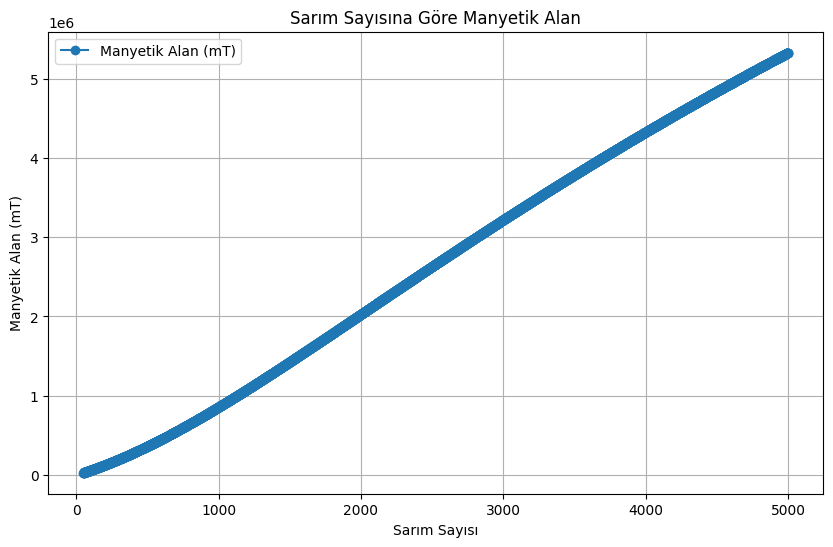

In [3]:
# Parametre aralığı
sarim_araligi = range(50, 5000, 1)  # 100 ile 2000 arasında, 100 artışla
manyetik_alanlar = []
sarım_sayilari = []

# Döngü ile farklı sarım sayıları için hesaplama
for sarim in sarim_araligi:
    result = magnetic_field_calc(
        inner_radius=0.05,  # metre
        coil_width=0.02,  # metre
        wire_dia=0.001,  # metre
        wire_dia_bare=0.0008,  # metre
        relative_permeability=100,
        num_turn=sarim,
        current=5,  # amper
        frequency=50,  # Hz
        distance=0.1,  # metre
        compact_factor=0.9
    )
    sarım_sayilari.append(sarim)
    manyetik_alanlar.append(result["magnetic_field_mT"])

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(sarım_sayilari, manyetik_alanlar, marker='o', label="Manyetik Alan (mT)")
plt.title("Sarım Sayısına Göre Manyetik Alan")
plt.xlabel("Sarım Sayısı")
plt.ylabel("Manyetik Alan (mT)")
plt.grid(True)
plt.legend()
plt.show()

## Sarım Sayısı ve Akım Değeri

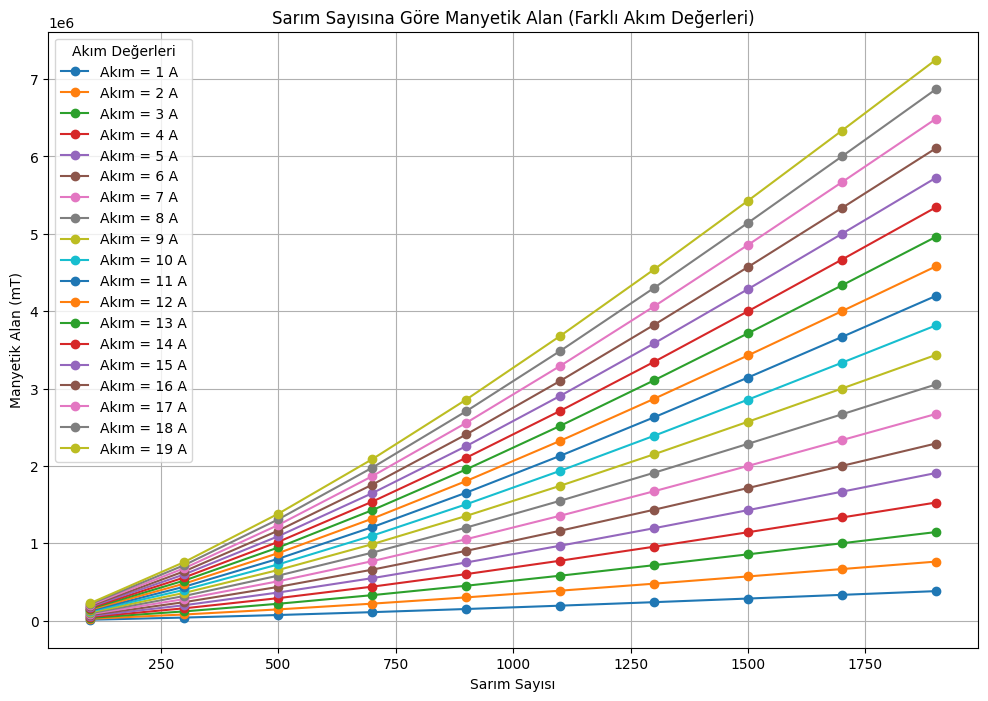

In [6]:
import matplotlib.pyplot as plt

# Parametreler
sarim_araligi = range(100, 2001, 200)  # 100'den 2000'e kadar sarım sayısı
akim_degerleri = range(1, 20, 1)       # Akım değerleri (amper)
results = {}

# Hesaplamalar
for akim in akim_degerleri:
    manyetik_alanlar = []
    for sarim in sarim_araligi:
        result = magnetic_field_calc(
            inner_radius=0.05,  # metre
            coil_width=0.02,  # metre
            wire_dia=0.001,  # metre
            wire_dia_bare=0.0008,  # metre
            relative_permeability=100,
            num_turn=sarim,
            current=akim,  # amper
            frequency=50,  # Hz
            distance=0.1,  # metre
            compact_factor=0.9
        )
        manyetik_alanlar.append(result["magnetic_field_mT"])
    results[akim] = manyetik_alanlar

# Grafik Çizimi
plt.figure(figsize=(12, 8))

for akim, manyetik_alanlar in results.items():
    plt.plot(sarim_araligi, manyetik_alanlar, marker='o', label=f"Akım = {akim} A")

plt.title("Sarım Sayısına Göre Manyetik Alan (Farklı Akım Değerleri)")
plt.xlabel("Sarım Sayısı")
plt.ylabel("Manyetik Alan (mT)")
plt.grid(True)
plt.legend(title="Akım Değerleri")
plt.show()


## Tel Çapının (Wire Diameter) Etkisi

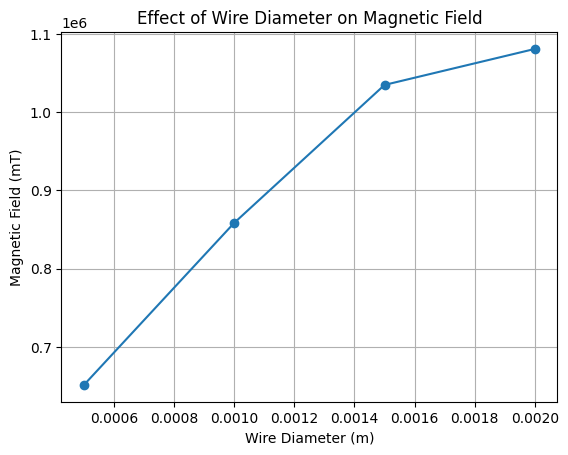

In [14]:
import matplotlib.pyplot as plt

# Parametreler
wire_dia_values = [0.0005, 0.001, 0.0015, 0.002]  # Tel çapı (metre)
magnetic_fields = []

# Hesaplama
for wire_dia in wire_dia_values:
    result = magnetic_field_calc(
        inner_radius=0.05,
        coil_width=0.02,
        wire_dia=wire_dia,
        wire_dia_bare=0.0008,
        relative_permeability=100,
        num_turn=1000,
        current=5,
        frequency=50,
        distance=0.1,
        compact_factor=0.9
    )
    magnetic_fields.append(result["magnetic_field_mT"])

# Grafik
plt.plot(wire_dia_values, magnetic_fields, marker='o')
plt.xlabel("Wire Diameter (m)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Effect of Wire Diameter on Magnetic Field")
plt.grid()
plt.show()


Bobin Genişliğinin (Coil Width) Etkisi

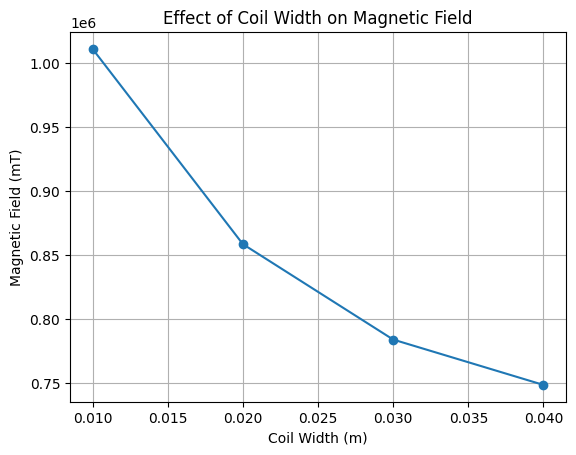

In [15]:
coil_width_values = [0.01, 0.02, 0.03, 0.04]  # Bobin genişliği (metre)
magnetic_fields = []

for coil_width in coil_width_values:
    result = magnetic_field_calc(
        inner_radius=0.05,
        coil_width=coil_width,
        wire_dia=0.001,
        wire_dia_bare=0.0008,
        relative_permeability=100,
        num_turn=1000,
        current=5,
        frequency=50,
        distance=0.1,
        compact_factor=0.9
    )
    magnetic_fields.append(result["magnetic_field_mT"])

plt.plot(coil_width_values, magnetic_fields, marker='o')
plt.xlabel("Coil Width (m)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Effect of Coil Width on Magnetic Field")
plt.grid()
plt.show()


 ## Mesafenin (Distance) Etkisi

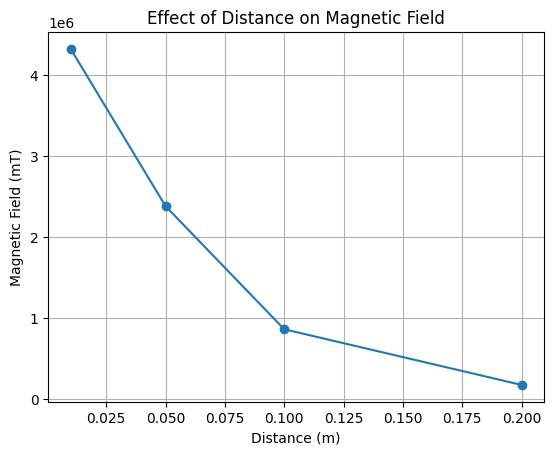

In [16]:
distance_values = [0.01, 0.05, 0.1, 0.2]  # Mesafe (metre)
magnetic_fields = []

for distance in distance_values:
    result = magnetic_field_calc(
        inner_radius=0.05,
        coil_width=0.02,
        wire_dia=0.001,
        wire_dia_bare=0.0008,
        relative_permeability=100,
        num_turn=1000,
        current=5,
        frequency=50,
        distance=distance,
        compact_factor=0.9
    )
    magnetic_fields.append(result["magnetic_field_mT"])

plt.plot(distance_values, magnetic_fields, marker='o')
plt.xlabel("Distance (m)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Effect of Distance on Magnetic Field")
plt.grid()
plt.show()


## Manyetik Geçirgenliğin (Relative Permeability) Etkisi


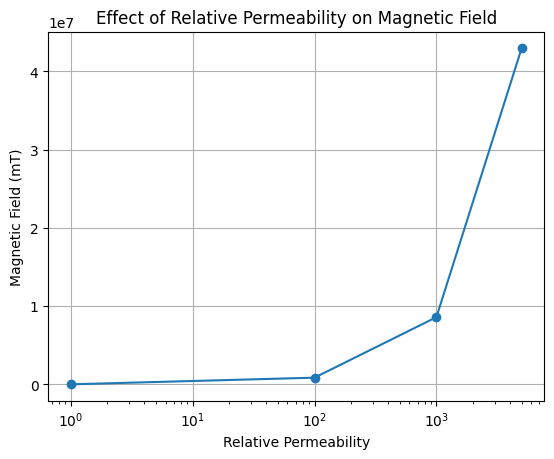

In [17]:
relative_permeabilities = [1, 100, 1000, 5000]  # Geçirgenlik
magnetic_fields = []

for relative_permeability in relative_permeabilities:
    result = magnetic_field_calc(
        inner_radius=0.05,
        coil_width=0.02,
        wire_dia=0.001,
        wire_dia_bare=0.0008,
        relative_permeability=relative_permeability,
        num_turn=1000,
        current=5,
        frequency=50,
        distance=0.1,
        compact_factor=0.9
    )
    magnetic_fields.append(result["magnetic_field_mT"])

plt.plot(relative_permeabilities, magnetic_fields, marker='o')
plt.xlabel("Relative Permeability")
plt.ylabel("Magnetic Field (mT)")
plt.title("Effect of Relative Permeability on Magnetic Field")
plt.grid()
plt.xscale("log")
plt.show()


## Frekansın (Frequency) Etkisi


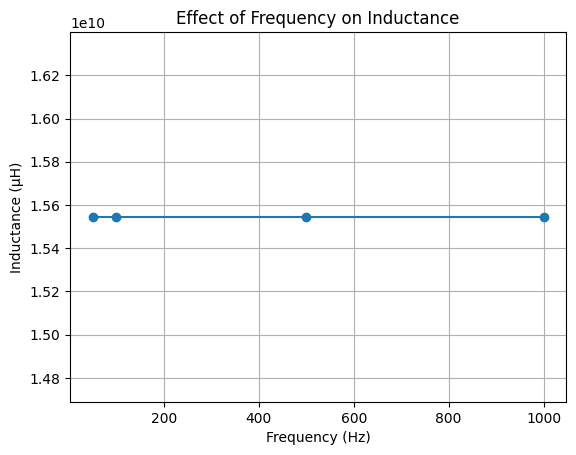

In [18]:
frequencies = [50, 100, 500, 1000]  # Frekans (Hz)
inductances = []

for frequency in frequencies:
    result = magnetic_field_calc(
        inner_radius=0.05,
        coil_width=0.02,
        wire_dia=0.001,
        wire_dia_bare=0.0008,
        relative_permeability=100,
        num_turn=1000,
        current=5,
        frequency=frequency,
        distance=0.1,
        compact_factor=0.9
    )
    inductances.append(result["inductance_uH"])

plt.plot(frequencies, inductances, marker='o')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Inductance (µH)")
plt.title("Effect of Frequency on Inductance")
plt.grid()
plt.show()


# Katman Sıkılığı (Compact Factor)

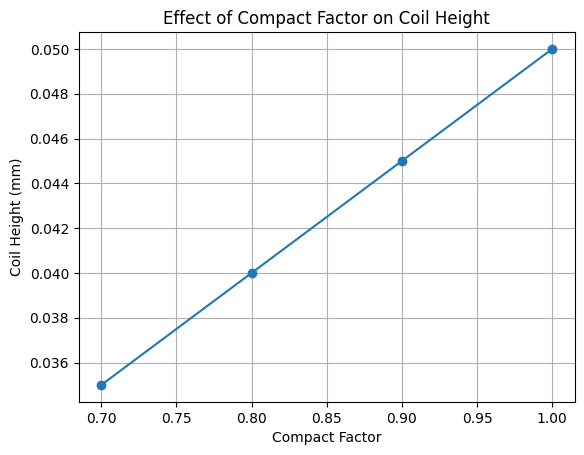

In [19]:
compact_factors = [0.7, 0.8, 0.9, 1.0]  # Katman sıkılığı
coil_heights = []

for compact_factor in compact_factors:
    result = magnetic_field_calc(
        inner_radius=0.05,
        coil_width=0.02,
        wire_dia=0.001,
        wire_dia_bare=0.0008,
        relative_permeability=100,
        num_turn=1000,
        current=5,
        frequency=50,
        distance=0.1,
        compact_factor=compact_factor
    )
    coil_heights.append(result["coil_height_mm"])

plt.plot(compact_factors, coil_heights, marker='o')
plt.xlabel("Compact Factor")
plt.ylabel("Coil Height (mm)")
plt.title("Effect of Compact Factor on Coil Height")
plt.grid()
plt.show()


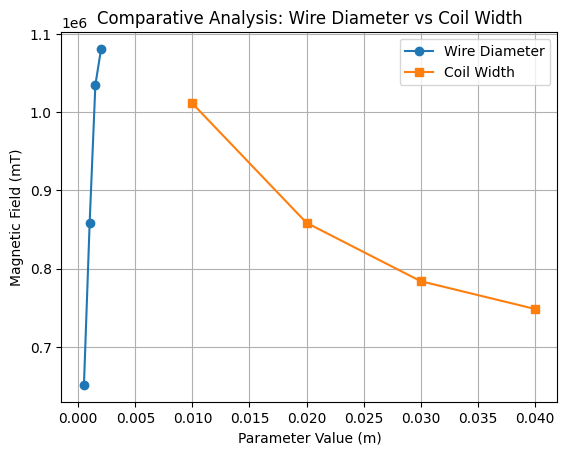

In [20]:
import matplotlib.pyplot as plt

# Tel çapı için parametreler
wire_dia_values = [0.0005, 0.001, 0.0015, 0.002]  # Tel çapı (metre)
magnetic_fields_wire_dia = []

for wire_dia in wire_dia_values:
    result = magnetic_field_calc(
        inner_radius=0.05,
        coil_width=0.02,
        wire_dia=wire_dia,
        wire_dia_bare=0.0008,
        relative_permeability=100,
        num_turn=1000,
        current=5,
        frequency=50,
        distance=0.1,
        compact_factor=0.9
    )
    magnetic_fields_wire_dia.append(result["magnetic_field_mT"])

# Bobin genişliği için parametreler
coil_width_values = [0.01, 0.02, 0.03, 0.04]  # Bobin genişliği (metre)
magnetic_fields_coil_width = []

for coil_width in coil_width_values:
    result = magnetic_field_calc(
        inner_radius=0.05,
        coil_width=coil_width,
        wire_dia=0.001,
        wire_dia_bare=0.0008,
        relative_permeability=100,
        num_turn=1000,
        current=5,
        frequency=50,
        distance=0.1,
        compact_factor=0.9
    )
    magnetic_fields_coil_width.append(result["magnetic_field_mT"])

# Grafik
plt.plot(wire_dia_values, magnetic_fields_wire_dia, marker='o', label="Wire Diameter")
plt.plot(coil_width_values, magnetic_fields_coil_width, marker='s', label="Coil Width")

# Grafik ayarları
plt.xlabel("Parameter Value (m)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Comparative Analysis: Wire Diameter vs Coil Width")
plt.legend()
plt.grid()
plt.show()
